# use case answer 2 third answer :- wael atalla gerges

In [1]:
# mporting the main toolkits

In [1]:
import numpy as np
import itertools


In [2]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
import seaborn as sns
import string
import nltk
import warnings 
import os
warnings.filterwarnings('ignore', category=DeprecationWarning)
pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

In [5]:
# 1- Reading the Dataset

In [6]:
path = os.path.join('f:' + os.sep, 'Amazon', 'use case 2', 'Use Case 2', 'Use Case 2', 'dataset', '1429_1.csv')
df3 = pd.read_csv(path)

C:\Users\waael\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df3.head()


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [8]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
id                      34660 non-null object
name                    27900 non-null object
asins                   34658 non-null object
brand                   34660 non-null object
categories              34660 non-null object
keys                    34660 non-null object
manufacturer            34660 non-null object
reviews.date            34621 non-null object
reviews.dateAdded       24039 non-null object
reviews.dateSeen        34660 non-null object
reviews.didPurchase     1 non-null object
reviews.doRecommend     34066 non-null object
reviews.id              1 non-null float64
reviews.numHelpful      34131 non-null float64
reviews.rating          34627 non-null float64
reviews.sourceURLs      34660 non-null object
reviews.text            34659 non-null object
reviews.title           34655 non-null object
reviews.userCity        0 non-null float64
reviews.userProvince    0

In [9]:
df = df3

In [10]:
df = pd.DataFrame()
df[['text', 'rating']] = df3[['reviews.text', 'reviews.rating']]
df.head()

,text,rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [11]:
df.isnull().sum()

text       1
rating    33
dtype: int64

In [12]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34626 entries, 0 to 34659
Data columns (total 2 columns):
text      34626 non-null object
rating    34626 non-null float64
dtypes: float64(1), object(1)
memory usage: 811.5+ KB


In [13]:
df['label'] = df['rating'].apply(lambda x : 1 if x >= 4 else 0) 

# drop the unneeded column of ratings
df.drop(labels=['rating'], axis=1, inplace=True)

df.head()

,text,label
0,This product so far has not disappointed. My c...,1
1,great for beginner or experienced person. Boug...,1
2,Inexpensive tablet for him to use and learn on...,1
3,I've had my Fire HD 8 two weeks now and I love...,1
4,I bought this for my grand daughter when she c...,1


In [14]:
# 2- Text Preprocessing

In [15]:
def remove_pattern(text, pattern):
       
    # find all the pattern in the input text and return a list of postion indeces 
    r = re.findall(pattern, text)
    
    # replace the pattern with an empty space
    for i in r: text = re.sub(pattern, '', text)
    
    return text

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\waael\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\waael\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
# lower case every word to ease the upcoming processes 

df['text'] = df['text'].str.lower()

# tokenize the text to search for any stop words to remove it
df['tokenized_text'] = df.text.apply(lambda x : x.split())

# creating a set of stopwords(if you wonder why set cuz it is faster than a list)
stopWords = set(nltk.corpus.stopwords.words('english'))
df['tokenized_text'] = df['tokenized_text'].apply(lambda x : [word for word in x if not word in stopWords])

# create a word net lemma
lemma = nltk.stem.WordNetLemmatizer()
pos = nltk.corpus.wordnet.VERB
df['tokenized_text'] = df['tokenized_text'].apply(lambda x : [lemma.lemmatize(word, pos) for word in x])

# remove any punctuation
df['tokenized_text'] = df['tokenized_text'].apply(lambda x : [ remove_pattern(word,'\.') for word in x])

# rejoin the text again to get a cleaned text
df['cleaned_text'] = df['tokenized_text'].apply(lambda x : ' '.join(x))

df.drop(labels=['tokenized_text'], axis=1, inplace=True)

df.head()

,text,label,cleaned_text
0,this product so far has not disappointed. my c...,1,product far disappointed children love use lik...
1,great for beginner or experienced person. boug...,1,great beginner experience person buy gift love
2,inexpensive tablet for him to use and learn on...,1,"inexpensive tablet use learn on, step nabi thr..."
3,i've had my fire hd 8 two weeks now and i love...,1,i've fire hd 8 two weeks love it tablet great ...
4,i bought this for my grand daughter when she c...,1,"buy grand daughter come visit set user, enter ..."


In [19]:
# 3- Features Extraction

In [20]:
# i- Bag of Words Method

In [21]:
from sklearn.feature_extraction.text import CountVectorizer


# perform vectorization on our cleaned text 
bow_vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english', max_features=1000)

bow_features = bow_vectorizer.fit_transform(df['cleaned_text'])

bow_df = pd.DataFrame(bow_features.toarray(), columns=bow_vectorizer.get_feature_names())

bow_df.head()

,10,100,11,12,15,16,1st,20,2nd,30,...,worth,wrong,xmas,year,years,yes,young,younger,youtube,yr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# ii- TF-IDF Method

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_Vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, max_features=1000, stop_words='english')

tfidf_features = tfidf_Vectorizer.fit_transform(df['cleaned_text'])

tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_Vectorizer.get_feature_names())

tfidf_df.head()

,10,100,11,12,15,16,1st,20,2nd,30,...,worth,wrong,xmas,year,years,yes,young,younger,youtube,yr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# 4- Dataset Split

In [25]:
from sklearn.model_selection import train_test_split

X_train_bow, X_metric_bow, y_train_bow, y_metric_bow = train_test_split(bow_df, df['label'], test_size=0.2, random_state=42)
X_test_bow, X_valid_bow, y_test_bow, y_valid_bow = train_test_split(X_metric_bow, y_metric_bow, test_size=0.5, random_state=42)


X_train_tfidf, X_metric_tfidf, y_train_tfidf, y_metric_tfidf = train_test_split(tfidf_df, df['label'], test_size=0.2, random_state=42)
X_test_tfidf, X_valid_tfidf, y_test_tfidf, y_valid_tfidf = train_test_split(X_metric_tfidf, y_metric_tfidf, test_size=0.5, random_state=42)

In [26]:
# 5- Building a Machine Learning Model

In [27]:
#Dummy Classifier

In [28]:
X_train, X_test, y_train, y_test = X_train_bow, X_metric_bow, y_train_bow, y_metric_bow

In [29]:
def modeling(Model, Xtrain = bow_vectorizer , Xtest= bow_df):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

In [30]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score 

clf = DummyClassifier(strategy = 'stratified', random_state =42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = f1_score(y_test, y_pred, average = 'weighted')
    
# Printing evaluation metric (f1-score) 
print("f1 score: {}".format(score))

f1 score: 0.8794452793131138


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.07      0.07      0.07       435
           1       0.94      0.93      0.93      6491

    accuracy                           0.88      6926
   macro avg       0.50      0.50      0.50      6926
weighted avg       0.88      0.88      0.88      6926



In [32]:
y_pred_cv_logreg = y_pred

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [34]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['4','5'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

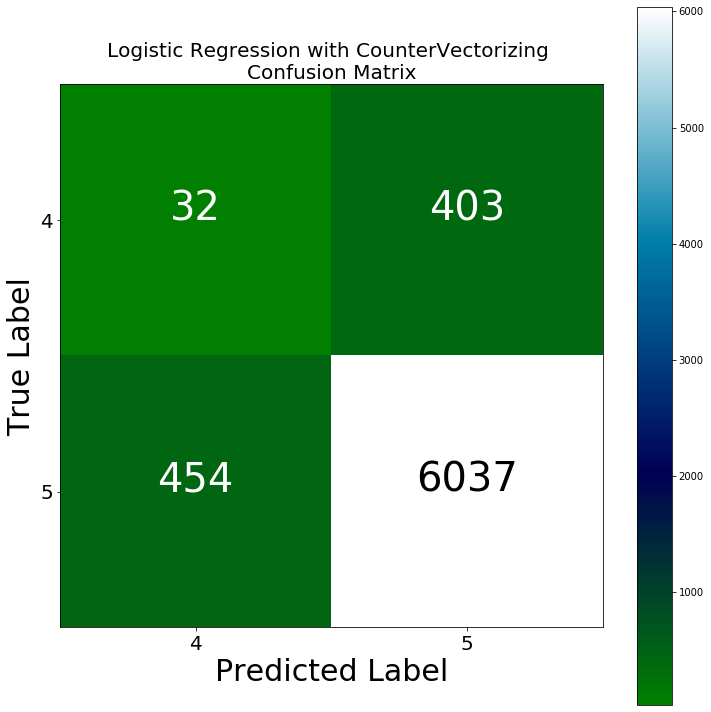

In [35]:

disp_confusion_matrix(y_pred_cv_logreg, "Logistic Regression")


In [36]:
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label, vector):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['negative ', 'positive', 'nutrural']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [37]:
def comparison_table(y_preds, labels):
    
    # empty list for collecting dataframes
    frames_tv = [] 
    
    # list for y_preds
    y_preds_tv = y_preds
    
    # list for labels
    labels_tv = labels  
    
    vector_tv = 'CountVect'
    
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(y_test, y_pred, label, vector_tv)
        frames_tv.append(df)

    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    
    global df_tv2
    df_tv2 = df_tv.set_index(['vectorizer', 'model', 'accuracy', 'class'])

In [38]:
def f1_score_bar_plot(df, category, title):
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

In [39]:
comparison_table(y_preds = [y_pred_cv_logreg], 
                labels = ['LogReg'])

In [40]:
df_tv2

precision    recall  f1-score  support
vectorizer model  accuracy class                                            
CountVect  LogReg 0.876263 negative    0.065844  0.073563  0.069490    435.0
                           positive    0.937422  0.930057  0.933725   6491.0
                           nutrural    0.882681  0.876263  0.879445   6926.0